# Ridge Regression

Ridge Regression is a technique for analyzing multiple regression that suffer from multicollinearity. However, multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value.


Regularization is for solving over-fitting problem which implies model performing well on training data. However, it performing poorly on validation test data. In addition, regularization solves problem by adding a penatly term to the objective function and control the model complexity using that penalty term.

1. Large number of variables
2. Low ratio of number observations to number of variables
3. High Multi-Collinearity


There are 2 Loss function in Regularization.  

L1 Loss function or L1 Regularization is minimizing the objective function by adding a penalty term to the sum of the absolute values of coefficients. This is called least absolute deviations method.

L2 Loss function or L2 Regularization is to minimize the objective function by adding a penalty term to the sum of the squares of cofficients. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,0,0.012107
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,0,0,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,0,1,-0.021531


In [4]:
X = dataset.drop(['Adj Close', 'Close'], axis=1)
y = dataset['Adj Close'].values.reshape(-1,1) 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

352 352


In [6]:
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
# Underfitting -  decrease alpha
# Overfitting - increase alpha
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [7]:
rr.score(X_train, y_train)

0.99962789000927199

In [8]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [9]:
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

ridge regression train score low alpha: 0.999627890009
ridge regression test score low alpha: 0.999638170233
ridge regression train score high alpha: 0.99927759257
ridge regression test score high alpha: 0.999293501107


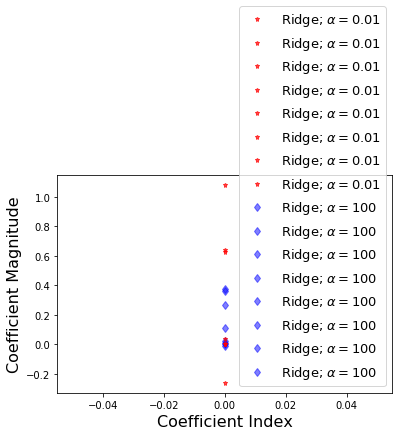

In [10]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers

plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [11]:
print('Coefficients:', rr.coef_)
print('Intercept:', rr.coef_)

Coefficients: [[ -2.62325641e-01   6.40217463e-01   6.24258888e-01  -6.85847006e-10
    3.19331279e-03   3.85846750e-02  -9.90763474e-04   1.07885538e+00]]
Intercept: [[ -2.62325641e-01   6.40217463e-01   6.24258888e-01  -6.85847006e-10
    3.19331279e-03   3.85846750e-02  -9.90763474e-04   1.07885538e+00]]


In [12]:
rr.score(X_test, y_test)

0.99963817023330459